# Análisis de resultados Laboratorio OpenMP 
**Presentado por:** *Juan David Avendaño y Sebastián Franco*, **Fecha:** *13 de Noviembre de 2023*

**Profesor:** *J. Corredor*, **Clase:** *Computación de Alto Rendimiento*, **Tema:** *Programa de Multiplicación de Matrices usando hilos OpenMP*

**Maestría de Inteligencia Artificial**, **Pontificia Universidad Javeriana**

### Descripción general del código
El código desarrollado se enfoca en analizar los resultados obtenidos durante un laboratorio de OpenMP. Este análisis se centra principalmente en dos métricas clave: el *Speedup* y el *Tiempo de Ejecución*. A través de diferentes funciones y procedimientos, el código proporciona una visión detallada del rendimiento del sistema en diferentes configuraciones, permitiendo identificar el punto óptimo de rendimiento para distintos tamaños de tarea.rsos es crucial.

Las métricas que fueron analizadas son: 
- **Speedup:** Esta métrica mide la mejora en el tiempo de ejecución al utilizar múltiples cores en comparación con un solo core. Un Speedup mayor indica una mayor eficiencia en el procesamiento paralelo.
- **Tiempo de Ejecución:** Refleja el tiempo total que tarda en completarse una tarea. Esta métrica es esencial para evaluar el rendimiento absoluto del sistema en diferentes configuraciones.

Las funciones clave del código incluyen

- **Extracción y Organización de Datos:** Estas funciones se encargan de cargar, procesar y preparar los datos para el análisis. Incluye la lectura de datos desde archivos, su limpieza y la transformación necesaria para estructurarlos de manera que faciliten el cálculo de métricas como el Speedup y el análisis del punto óptimo.
- **Cálculo del Speedup:** Se calcula el Speedup para cada experimento, comparando el tiempo de ejecución con múltiples cores frente al tiempo con un solo core.
- **Análisis de Punto Óptimo:** Mediante el análisis del cambio porcentual en el tiempo de ejecución y el Speedup, se identifica el número de cores que ofrece el mejor equilibrio entre rendimiento y eficiencia.
- **Visualización de Resultados:** Se generan gráficos que muestran cómo varían el tiempo de ejecución y el Speedup con diferentes números de cores y tamaños de tarea, proporcionando una representación visual clara del rendimiento del sistema.

El código es **flexible** y se puede **adaptar** para analizar diferentes **baterías de experimentos similares**, **facilitando** así la comparación entre **distintas configuraciones**. Con este análisis se pueden **tomar decisiones** sobre cómo **optimizar** el **rendimiento al paralelizar**, especialmente en contextos donde el equilibrio entre la rapidez de ejecución y la eficiencia en el uso de recursos es crucial.

### Librerías
Las librerías listadas a continuación son fundamentales para el funcionamiento del código desarrollado y se utilizan para facilitar diversas tareas, como la manipulación de datos, la realización de cálculos numéricos y la visualización de resultados. Cada una aporta herramientas específicas que permiten implementar de manera eficiente y efectiva las funcionalidades requeridas en el análisis de rendimiento de OpenMP:

- **os:** Proporciona una interfaz para interactuar con el sistema operativo. Se utiliza para gestionar rutas de archivos y directorios, lo que es crucial para cargar y guardar datos.
- **pandas (importado como pd):** Esencial para la manipulación y el análisis de datos. Permite organizar los datos en estructuras como DataFrames, facilitando su manipulación, filtrado y agregación para el cálculo de métricas.
- **matplotlib.pyplot (importado como plt):** Se utiliza para la creación de gráficos y visualizaciones. Esta librería es clave para representar visualmente los resultados del análisis, como el Speedup y el tiempo de ejecución en diferentes configuraciones.
- **numpy (importado como np):** Proporciona soporte para arrays y matrices, además de una amplia colección de funciones matemáticas. Se utiliza para realizar cálculos numéricos complejos, como el cálculo de cambios porcentuales y otras operaciones matemáticas necesarias en el análisis.

Estas librerías conforman el conjunto de herramientas que permiten realizar desde la extracción y la organización de los datos hasta el análisis y la visualización de los resultados obtenidos en el laboratorio.de OpenMP.

In [175]:
import os                                # Para interactuar con el sistema operativo y manejar rutas de archivos
import pandas as pd                      # Para análisis y manipulación de datos en estructuras como DataFrames
import matplotlib.pyplot as plt          # Para la visualización de datos y creación de gráficos
import numpy as np                       # Para operaciones numéricas y manejo de arrays

### Funciones
Las funciones en el código son esenciales para realizar tareas específicas dentro del análisis de rendimiento de OpenMP, desde la extracción de datos hasta la visualización de resultados. A continuación, se describe el propósito de cada una:n paralela con OpenMP.


- **extraer_datos:** Esta función se encarga de cargar los datos desde archivos de entrada. Lee los datos, los limpia y los estructura en un formato adecuado para su análisis, preparando el terreno para cálculos posteriores.
- **procesar_archivos:** Se utiliza para procesar y organizar los datos extraídos. Puede incluir tareas como filtrar datos irrelevantes, transformar datos en formatos más útiles y preparar conjuntos de datos para análisis más detallados.
- **ampliar_dataframe:** Amplía el DataFrame original agregando columnas adicionales o modificando las existentes para facilitar el análisis. Esta función puede descomponer campos complejos en múltiples columnas o calcular nuevos valores derivados.
- **agregar_numero_iteracion:** Añade una columna al DataFrame para indicar el número de iteración de cada registro, basándose en los valores de 'Core' y 'No. Core'. Esto es útil para segmentar los datos en conjuntos más manejables para análisis posteriores.
- **filtrar_maximos_por_iteracion:** Filtra el DataFrame para conservar solo los registros con el valor máximo para cada combinación de 'Core', 'Iteración' y 'archivo'. Esta función ayuda a identificar los casos de rendimiento máximo en diferentes configuraciones.
- **calcular_diferencia_tiempo_por_iteracion:** Calcula la diferencia máxima de tiempo entre el core de menor y mayor valor para cada iteración y core, proporcionando una medida de la variabilidad en el rendimiento.
- **calcular_speedup:** Esta función calcula el Speedup de cada experimento, una métrica clave que compara el rendimiento entre ejecuciones con múltiples cores y un solo core.
- **graficar_rendimiento:** Genera gráficos para visualizar cómo el tiempo de ejecución y el Speedup varían con diferentes números de cores y tamaños de matriz. Estos gráficos son fundamentales para la interpretación visual de los resultados del análisis.
- **encontrar_punto_optimo:** Analiza el cambio porcentual en el tiempo de ejecución y el Speedup para identificar el número de cores que proporciona el mejor equilibrio entre rendimiento y eficiencia, señalando el punto óptimo en diferentes configuraciones.
- **graficar_comparacion_tiempo:** Crea gráficos de barras que comparan el tiempo de ejecución para diferentes tamaños de matriz y número de cores, ofreciendo una perspectiva comparativa del rendimiento en diversas configuraciones.

Cada función contribuye a una fase específica del proceso de análisis, desde la preparación y procesamiento de datos hasta el cálculo de métricas clave y la visualización de los resultados.

In [176]:
def extraer_datos(ruta):
    """
    Esta función extrae números del principio y del final de cada línea en archivos de texto
    dentro de un directorio especificado y los almacena en un DataFrame de pandas.

    Entradas:
    - ruta: Una cadena de texto que especifica la ruta del directorio que contiene los archivos
            de texto a procesar.

    Salidas:
    - Un DataFrame de pandas donde cada fila corresponde a una línea de los archivos procesados.
      El DataFrame tiene tres columnas: 'No. Core' para el número al inicio de la línea,
      'valor' para el número al final de la línea y 'archivo' para el nombre del archivo de origen.

    Descripción del proceso:
    1. Inicializar una lista vacía para almacenar los datos extraídos.
    2. Recorrer cada archivo en el directorio especificado por la ruta.
    3. Para cada archivo, leer todas sus líneas.
    4. Para cada línea, intentar extraer el primer y el último elemento como números enteros,
       eliminando caracteres no numéricos.
    5. Si ambos elementos son números válidos, agregarlos junto con el nombre del archivo a la lista.
    6. Crear un DataFrame a partir de la lista de datos.
    7. Retornar el DataFrame.
    """
    # Lista para almacenar los datos extraídos
    data = []

    # Recorrer los archivos en la ruta proporcionada
    for filename in os.listdir(ruta):
        # Construir la ruta completa al archivo
        filepath = os.path.join(ruta, filename)

        # Verificar que sea un archivo y no una carpeta
        if os.path.isfile(filepath):
            # Abrir y leer el contenido del archivo
            with open(filepath, 'r') as file:
                lines = file.readlines()

                # Procesar cada línea del archivo
                for line in lines:
                    # Dividir la línea en partes (asumiendo separación por espacios)
                    parts = line.split()

                    # Verificar que la línea contenga al menos un elemento
                    if parts:
                        try:
                            # Extraer y convertir el primer y último elemento de la línea,
                            # eliminando caracteres no numéricos
                            inicio = int(''.join(filter(str.isdigit, parts[0])))  # Número al inicio
                            final = int(''.join(filter(str.isdigit, parts[-1])))  # Número al final

                            # Agregar los datos extraídos a la lista
                            data.append({"No. Core": inicio, "valor": final, "archivo": filename})
                        except ValueError:
                            # Imprimir un mensaje de error si la conversión falla
                            print(f"Error de conversión en el archivo {filename}: {line.strip()}")

    # Crear un DataFrame a partir de la lista de datos
    df = pd.DataFrame(data)

    # Retornar el DataFrame
    return df

In [177]:
def procesar_archivos(df):
    """
    Esta función procesa un DataFrame que contiene una columna 'archivo' con nombres de archivo
    en un formato específico y separa esta columna en tres nuevas columnas: 'MM', 'Size', y
    'cantidad cores'.

    Entradas:
    - df: DataFrame con las columnas 'No. Core', 'valor', 'archivo'. Los valores de 'archivo'
          deben tener el formato 'MM1c-Size100-core1'.

    Salidas:
    - DataFrame modificado con tres nuevas columnas 'MM', 'Size', y 'cantidad cores' extraídas
      de la columna 'archivo'.

    Descripción del proceso:
    1. Definir una función auxiliar para extraer las partes del nombre del archivo.
    2. Aplicar esta función a la columna 'archivo' del DataFrame.
    3. Separar los resultados en tres nuevas columnas en el DataFrame.
    4. Retornar el DataFrame modificado.
    """

    # Función auxiliar para extraer las partes del nombre del archivo
    def extraer_partes(nombre_archivo):
        partes = nombre_archivo.split('-')
        mm = partes[0]  # Extraer la parte de MM
        size = partes[1].replace('Size', '')  # Extraer y limpiar la parte de Size
        cores = partes[2].replace('core', '')  # Extraer y limpiar la parte de cantidad cores
        return mm, size, cores

    # Aplicar la función auxiliar a la columna 'archivo' y crear nuevas columnas
    df[['MM', 'Size', 'cantidad cores']] = df['archivo'].apply(
        lambda x: pd.Series(extraer_partes(x))
    )

    # Retornar el DataFrame modificado
    return df


In [178]:
def ampliar_dataframe(df):
    """
    Esta función toma un DataFrame que contiene una columna 'archivo' con nombres de archivo
    en un formato específico y los descompone en tres nuevas columnas: 'MM', 'Size', y 'Core'.

    Entradas:
    - df: Un DataFrame que debe incluir una columna llamada 'archivo'. Los valores de esta
          columna deben seguir un formato específico como 'MM1c-Size100-core1'.

    Salidas:
    - Un DataFrame modificado con tres nuevas columnas ('MM', 'Size', 'Core') extraídas
      de la columna 'archivo'.

    Descripción del proceso:
    1. Definir una función interna (anidada) para extraer las partes del nombre del archivo.
    2. Aplicar esta función interna a cada valor de la columna 'archivo' en el DataFrame.
    3. Crear tres nuevas columnas en el DataFrame a partir de los valores extraídos.
    4. Devolver el DataFrame modificado.
    """

    # Función interna para descomponer el nombre del archivo en sus componentes
    def extraer_partes(archivo):
        """
        Extrae las partes individuales del nombre del archivo.

        Entrada:
        - archivo: Una cadena de texto que representa el nombre del archivo.

        Salida:
        - Una tupla que contiene las partes extraídas: MM, Size, y Core.
        """

        # Dividir el nombre del archivo en partes usando el carácter '-'
        partes = archivo.split('-')

        # Extraer la parte MM, que es el primer elemento de la lista
        mm = partes[0]

        # Extraer y convertir la parte Size a entero, eliminando el prefijo 'Size'
        size = int(partes[1].replace('Size', ''))

        # Extraer y convertir la parte Core a entero, eliminando el prefijo 'core'
        core = int(partes[2].replace('core', ''))

        # Devolver una tupla con los tres componentes extraídos
        return mm, size, core

    # Aplicar la función interna a cada elemento de la columna 'archivo'
    # y asignar los resultados a tres nuevas columnas en el DataFrame
    df[['MM', 'Size', 'Core']] = df['archivo'].apply(lambda x: pd.Series(extraer_partes(x)))

    # Devolver el DataFrame con las nuevas columnas añadidas
    return df


In [179]:
def agregar_numero_iteracion(df):
    """
    Añade una columna 'Iteración' al DataFrame, basándose en las columnas 'Core' y 'No. Core'.
    El número de iteración se incrementa cada vez que 'No. Core' completa un ciclo desde 0 hasta 'Core-1'.

    Entradas:
    - df: DataFrame con las columnas 'Core' y 'No. Core'.

    Salidas:
    - df: DataFrame modificado con una nueva columna 'Iteración'.

    Descripción del proceso:
    1. Ordenar el DataFrame por 'archivo' y 'No. Core' para asegurar la correcta secuencia.
    2. Calcular el número de iteración basándose en la frecuencia de reinicio de 'No. Core' a 0.
    3. Agregar la columna 'Iteración' al DataFrame.
    """

    # Asegurar que el DataFrame esté ordenado correctamente por 'archivo' y 'No. Core'
    df = df.sort_values(by=['archivo', 'No. Core'])

    # Inicializar la columna 'Iteración' a 1
    df['Iteración'] = 1

    # Incrementar el número de iteración cada vez que 'No. Core' vuelve a 0
    df['Iteración'] = df.groupby(['archivo', 'Core'])['No. Core'].cumcount() // df['Core'] + 1

    return df

In [180]:
def filtrar_maximos_por_iteracion(df):
    """
    Filtra el DataFrame para devolver solo los registros con el valor máximo en cada combinación 
    de 'Core', 'Iteración' y 'archivo'.

    Entradas:
    - df: DataFrame con las columnas 'Core', 'Iteración', 'archivo' y 'valor'.

    Salidas:
    - df_maximos: DataFrame con los registros que tienen el valor máximo para cada combinación 
      de 'Core', 'Iteración' y 'archivo'.

    Descripción del proceso:
    1. Agrupar el DataFrame por 'archivo', 'Core' e 'Iteración'.
    2. Encontrar el registro con el valor máximo en la columna 'valor' para cada grupo.
    3. Combinar estos registros en un nuevo DataFrame.
    """

    # Agrupar el DataFrame por 'archivo', 'Core' e 'Iteración' y encontrar el valor máximo en cada grupo
    df_maximos = df.loc[df.groupby(['archivo', 'Core', 'Iteración'])['valor'].idxmax()]

    return df_maximos

In [181]:
def calcular_diferencia_tiempo_por_iteracion(df):
    """
    Calcula la diferencia entre el tiempo máximo y mínimo para cada combinación de 'Core', 
    'Iteración' y 'archivo' en el DataFrame.

    Entradas:
    - df: DataFrame con las columnas 'Core', 'Iteración', 'archivo' y 'valor'.

    Salidas:
    - df_diferencias: DataFrame con las diferencias de tiempo para cada combinación de 'Core', 
      'Iteración' y 'archivo'.

    Descripción del proceso:
    1. Agrupar el DataFrame por 'archivo', 'Core' e 'Iteración'.
    2. Calcular el valor máximo y mínimo en la columna 'valor' para cada grupo.
    3. Calcular la diferencia entre estos valores.
    4. Crear un nuevo DataFrame con estas diferencias.
    """

    # Función para calcular la diferencia de tiempo en cada grupo
    def calcular_diferencia(grupo):
        maximo = grupo['valor'].max()
        minimo = grupo['valor'].min()
        return maximo - minimo

    # Aplicar la función de cálculo de diferencia a cada grupo
    df_diferencias = df.groupby(['archivo', 'Core', 'Iteración']).apply(calcular_diferencia).reset_index(name='Diferencia Tiempo')

    return df_diferencias

In [182]:
def calcular_speedup(df):
    """
    Calcula el Speedup para cada registro en el DataFrame y lo añade como una nueva columna. 
    El Speedup se calcula como el tiempo de ejecución en un solo core dividido por el tiempo 
    de ejecución en múltiples cores.

    Entradas:
    - df: DataFrame con las columnas 'Core', 'Size' y 'valor' (tiempo de ejecución).

    Salidas:
    - df: DataFrame modificado con una nueva columna 'Speedup' y la columna 'valor' renombrada a 'tiempo_ejecución'.
    """

    # Crear una copia del DataFrame
    df_copy = df.copy()

    # Renombrar la columna 'valor' a 'tiempo_ejecución'
    df_copy = df_copy.rename(columns={'valor': 'tiempo_ejecución'})

    # Crear una columna 'Speedup' inicializada con NaN
    df_copy['Speedup'] = np.nan

    # Agrupar por 'Size' y obtener el primer tiempo de ejecución para Core = 1
    tiempo_core_1 = df_copy[df_copy['Core'] == 1].groupby('Size')['tiempo_ejecución'].first()

    # Iterar sobre las filas para calcular el Speedup
    for index, row in df_copy.iterrows():
        if row['Core'] == 1:
            # Si Core es 1, el Speedup es 1
            df_copy.at[index, 'Speedup'] = 1
        else:
            try:
                # Buscar el tiempo de ejecución correspondiente para Core = 1 con el mismo Size
                tiempo_referencia = tiempo_core_1[row['Size']]
                df_copy.at[index, 'Speedup'] = tiempo_referencia / row['tiempo_ejecución']
            except KeyError:
                # Asignar NaN si no hay un tiempo de referencia para Core = 1 con el mismo Size
                df_copy.at[index, 'Speedup'] = np.nan

    return df_copy


In [183]:
def graficar_rendimiento(df):
    """
    Grafica el rendimiento basado en el tiempo de ejecución y el Speedup para diferentes tamaños de matriz y número de cores.

    Entrada:
    - df: DataFrame con las columnas 'Core', 'Size', 'tiempo_ejecución' y 'Speedup'.

    La función crea un conjunto de gráficos para cada tamaño de matriz (Size), mostrando cómo varía el tiempo de ejecución y el Speedup
    con respecto al número de cores.
    """

    # Obtener los tamaños de matriz únicos
    sizes = df['Size'].unique()
    
    # Crear un gráfico separado para cada tamaño
    for size in sizes:
        # Filtrar el DataFrame para obtener solo las filas correspondientes a este tamaño
        df_size = df[df['Size'] == size]
        
        # Agrupar por número de cores y calcular la media del tiempo de ejecución
        group_tiempo = df_size.groupby('Core')['tiempo_ejecución'].mean().reset_index()
        group_speedup = df_size.groupby('Core')['Speedup'].mean().reset_index()
        
        # Crear el gráfico de tiempo de ejecución
        plt.figure(figsize=(10, 6))
        plt.plot(group_tiempo['Core'], group_tiempo['tiempo_ejecución'], marker='o', label=f'Size = {size}')
        
        # Añadir títulos y etiquetas
        plt.title(f'Tiempo de Ejecución vs Número de Cores para Size = {size}')
        plt.xlabel('Número de Cores')
        plt.ylabel('Tiempo de Ejecución (ms)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Crear el gráfico de Speedup
        plt.figure(figsize=(10, 6))
        plt.plot(group_speedup['Core'], group_speedup['Speedup'], marker='o', label=f'Size = {size}')
        
        # Añadir títulos y etiquetas
        plt.title(f'Speedup vs Número de Cores para Size = {size}')
        plt.xlabel('Número de Cores')
        plt.ylabel('Speedup')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Crear un gráfico combinado para todos los tamaños (Tiempo de Ejecución)
    plt.figure(figsize=(10, 6))
    for size in sizes:
        df_size = df[df['Size'] == size]
        group_tiempo = df_size.groupby('Core')['tiempo_ejecución'].mean().reset_index()
        plt.plot(group_tiempo['Core'], group_tiempo['tiempo_ejecución'], marker='o', label=f'Size = {size}')
    
    plt.title('Tiempo de Ejecución vs Número de Cores (Todos los Tamaños)')
    plt.xlabel('Número de Cores')
    plt.ylabel('Tiempo de Ejecución (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Crear un gráfico combinado para todos los tamaños (Speedup)
    plt.figure(figsize=(10, 6))
    for size in sizes:
        df_size = df[df['Size'] == size]
        group_speedup = df_size.groupby('Core')['Speedup'].mean().reset_index()
        plt.plot(group_speedup['Core'], group_speedup['Speedup'], marker='o', label=f'Size = {size}')
    
    plt.title('Speedup vs Número de Cores (Todos los Tamaños)')
    plt.xlabel('Número de Cores')
    plt.ylabel('Speedup')
    plt.legend()
    plt.grid(True)
    plt.show()

In [184]:
def encontrar_punto_optimo(df):
    """
    Encuentra el punto óptimo (número de cores) para diferentes tamaños de matriz,
    basado principalmente en el Speedup.

    Entrada:
    - df: DataFrame con las columnas 'Core', 'Size', 'tiempo_ejecución' y 'Speedup'.

    Salida:
    - DataFrame con los puntos óptimos para cada tamaño de matriz.
    """

    # Obtener los tamaños de matriz únicos
    sizes = df['Size'].unique()

    puntos_optimos = []

    # Factor para determinar cuando el aumento del Speedup es insignificante
    factor_speedup = 0.05  # Este valor puede ser ajustado

    # Analizar cada tamaño
    for size in sorted(sizes):
        df_size = df[df['Size'] == size]
        group = df_size.groupby('Core')[['tiempo_ejecución', 'Speedup']].mean().reset_index()

        # Calcular el cambio relativo en Speedup
        cambio_speedup = np.diff(group['Speedup']) / group['Speedup'].iloc[:-1]

        # Encontrar el primer punto donde el aumento en Speedup es menor que el factor
        indices = np.where(cambio_speedup < factor_speedup)[0]
        if indices.size > 0:
            core_optimo = group['Core'].iloc[indices[0]]
        else:
            core_optimo = group['Core'].iloc[-1]

        puntos_optimos.append({"Size": size, "Core óptimo": core_optimo})

    return pd.DataFrame(puntos_optimos)


In [185]:
def graficar_comparacion_tiempo(df):
    """
    Grafica una comparación de los tiempos de ejecución para diferentes tamaños de matriz y número de cores.

    Entrada:
    - df: DataFrame con las columnas 'Core', 'Size' y 'tiempo_ejecución'.

    La función crea un gráfico de barras que muestra la media del tiempo de ejecución para cada combinación de 'Size' y 'Core'.
    """

    # Obtener los tamaños de matriz únicos
    sizes = df['Size'].unique()

    # Crear el gráfico
    plt.figure(figsize=(12, 8))

    # Espaciado para las barras
    bar_width = 0.15
    bar_positions = np.arange(len(df['Core'].unique()))

    # Añadir una barra para cada tamaño
    for i, size in enumerate(sizes):
        # Filtrar el DataFrame para obtener solo las filas correspondientes a este tamaño
        df_size = df[df['Size'] == size]

        # Agrupar por número de cores y calcular la media del tiempo de ejecución
        group = df_size.groupby('Core')['tiempo_ejecución'].mean().reset_index()

        # Añadir la barra al gráfico
        plt.bar(bar_positions + i * bar_width, group['tiempo_ejecución'], width=bar_width, label=f'Size = {size}')

    # Añadir títulos y etiquetas
    plt.title('Comparación de Tiempos de Ejecución')
    plt.xlabel('Número de Cores')
    plt.ylabel('Tiempo de Ejecución (ms)')
    plt.xticks(bar_positions + bar_width * (len(sizes) - 1) / 2, group['Core'])
    plt.legend()
    plt.grid(True)
    plt.show()

### Ejecución del código - Análisis de resultados 
A continuación, se ejecutará el código para el primer experimento, se encontrará el rendimiento para una matriz con M columnas. Es escencial tener en cuenta para la ejecución de este experimento que se debe modificar la variable ruta por la dirección Local en que se ha guardado la carpeta de los experimentos. 

#### Extracción y transformación de los datos

Se creará un dataframe con todos los experimentos realizados en dicha batería, la idea es dejar un dataframe que contenga las columnas: 
- **No. Core:** Número de identificación del core individual dentro de un experimento específico, utilizado para diferenciar entre los diversos cores en operación.
- **valor:** Tiempo de ejecución registrado en microseguntos, una métrica específica de rendimiento, para el core correspondiente en el experimento.
- **archivo:** Nombre del archivo de datos relacionado, que representa un experimento completo con ciertas características de tamaño y número de cores.
- **Size:** Tamaño de la matriz cuadradad que se multiplicará de forma aleatorio en el experimento.
- **Core:** Número total de cores utilizados en el experimento, indicando la escala de la computación paralela.

In [186]:
ruta = 'C:/Users/franc/Downloads/EXP-RendimientoMcolumnas/Soluciones'    # Se debe modificar la ruta, en donde se ha guardado la carpeta del experimento
datos = extraer_datos(ruta)                                              # Se extraen los datos y se guardan en el dataframe
df = ampliar_dataframe(datos)                                            # Se amplía la columna 'archivo' en 3 columnas MM, Size y Core
df = df.drop(columns=['MM'])                                             # Se elimina la columna MM que no aporta a nuestro análisis
df                                                                       # Se visualiza el dataframe 

,No. Core,valor,archivo,Size,Core
0,0,3751,MM1c-Size100-core1,100,1
1,0,696,MM1c-Size100-core1,100,1
2,0,651,MM1c-Size100-core1,100,1
3,0,729,MM1c-Size100-core1,100,1
4,0,688,MM1c-Size100-core1,100,1
...,...,...,...,...,...
11245,3,55807,MM1c-Size800-core8,800,8
11246,4,55808,MM1c-Size800-core8,800,8
11247,5,55807,MM1c-Size800-core8,800,8
11248,6,55809,MM1c-Size800-core8,800,8


La función 'agregar_numero_iteracion' crea una columna 'Iteración' en una copia del dataframe que se viene trabajando, esta columna numera las iteraciones de cada experimento de acuerdo con la cantidad de cores utilizados. En los experimentos con múltiples cores, como aquellos con 8 cores, esta columna agrupa los resultados: los primeros 8 registros correspondientes a cada uno de los 8 cores se marcan como la primera iteración (Iteración = 1), los siguientes 8 registros como la segunda iteración (Iteración = 2), y así sucesivamente. En contraste, para los experimentos realizados con un solo core, cada registro representa una iteración distinta, asignándose así un número único de iteración a cada uno. Esta columna Iteración es clave para simplificar el análisis posterior y facilitar el cálculo de métricas de rendimiento, ya que permite segmentar los datos de manera eficaz según las distintas fases o ciclos del experimento.

In [187]:
df_iteraciones = agregar_numero_iteracion(df)                                                     # Se añade la columna de número de iteraciones
df_iteraciones.to_csv('C:/Users/franc/Downloads/EXP-RendimientoMcolumnas/resultados.csv')         # Si se desea se puede utilizar este método de pandas para poder exportar en cualquier momento el dataframe a un csv y poderlo abrir desde una hoja de cálculo  para el fácil análisis.

In [188]:
df_iteraciones                                                     # Se visualiza el dataframe con el número de iteración

,No. Core,valor,archivo,Size,Core,Iteración
0,0,3751,MM1c-Size100-core1,100,1,1
1,0,696,MM1c-Size100-core1,100,1,2
2,0,651,MM1c-Size100-core1,100,1,3
3,0,729,MM1c-Size100-core1,100,1,4
4,0,688,MM1c-Size100-core1,100,1,5
...,...,...,...,...,...,...
11217,7,55684,MM1c-Size800-core8,800,8,30
11225,7,55796,MM1c-Size800-core8,800,8,30
11233,7,55756,MM1c-Size800-core8,800,8,30
11241,7,55727,MM1c-Size800-core8,800,8,30


En los experimentos realizados, se observan variaciones en los tiempos de ejecución entre los diferentes cores utilizados en cada ejecución. Aunque estos tiempos son generalmente similares, existen pequeñas diferencias que hacen que cada core tenga un tiempo de ejecución único. Para simplificar el análisis y representar de manera más concisa cada ejecución del experimento, se seleccionará un tiempo representativo para toda la ejecución. Este proceso involucra identificar un valor que mejor refleje el rendimiento general de todos los cores en una sola ejecución, para ello se escoge el tiempo máximo de todos los tiempos de cada core. 

In [189]:
df_max = filtrar_maximos_por_iteracion(df_iteraciones)     # Se calcula el máximo tiempo que le toma a un proceso completarse a partir de encontrar el máximo tiempo en cada uno de los cores. Se conserva únicamente dicho registro. 

Adicionalmente, se calculará la diferencia de tiempo entre el core con el tiempo máximo y el core con el tiempo mínimo en el mismo experimento. Esta métrica de diferencia proporcionará una perspectiva valiosa sobre la variabilidad del rendimiento dentro de una sola ejecución, ayudando a identificar posibles desequilibrios o ineficiencias en la distribución del trabajo entre los cores.

In [190]:
df_dt = calcular_diferencia_tiempo_por_iteracion(df_iteraciones) # Se calculan los deltas de tiempo entre ejecuciones 
df_dt                                                            # Se visualiza el resultado

,archivo,Core,Iteración,Diferencia Tiempo
0,MM1c-Size100-core1,1,1,0
1,MM1c-Size100-core1,1,2,0
2,MM1c-Size100-core1,1,3,0
3,MM1c-Size100-core1,1,4,0
4,MM1c-Size100-core1,1,5,0
...,...,...,...,...
1195,MM1c-Size800-core8,8,26,1061
1196,MM1c-Size800-core8,8,27,179
1197,MM1c-Size800-core8,8,28,538
1198,MM1c-Size800-core8,8,29,211


Se grafican los tiempos para un análisis visual

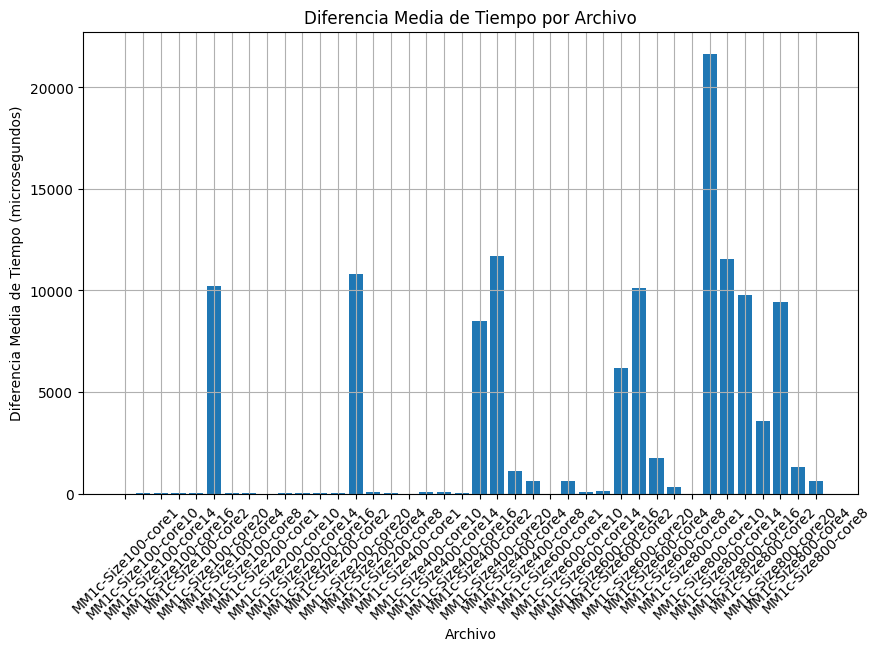

In [191]:
# Agrupar por archivo y calcular la media de la diferencia de tiempo
df_dt_grouped = df_dt.groupby('archivo')['Diferencia Tiempo'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_dt_grouped['archivo'], df_dt_grouped['Diferencia Tiempo'])
plt.title('Diferencia Media de Tiempo por Archivo')
plt.xlabel('Archivo')
plt.ylabel('Diferencia Media de Tiempo (microsegundos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Se calcula el speedup y se adiciona como columna a un nuevo dataframe para así tener el dataframe completo para el análisis

In [192]:
df_complete = calcular_speedup(df_max)         # Se añade la columna Speedup

In [193]:
df_complete                                    # Se visualiza el dataframe completo

,No. Core,tiempo_ejecución,archivo,Size,Core,Iteración,Speedup
0,0,3751,MM1c-Size100-core1,100,1,1,1.000000
1,0,696,MM1c-Size100-core1,100,1,2,1.000000
2,0,651,MM1c-Size100-core1,100,1,3,1.000000
3,0,729,MM1c-Size100-core1,100,1,4,1.000000
4,0,688,MM1c-Size100-core1,100,1,5,1.000000
...,...,...,...,...,...,...,...
11200,6,56745,MM1c-Size800-core8,800,8,26,7.249626
11057,7,55850,MM1c-Size800-core8,800,8,27,7.365801
11065,7,56305,MM1c-Size800-core8,800,8,28,7.306278
11177,7,55886,MM1c-Size800-core8,800,8,29,7.361056


In [194]:
df_complete_c = df_complete

#### Visualización de métricas
A continuación se visualizan las 2 métricas: tiempo de ejecución y speedup

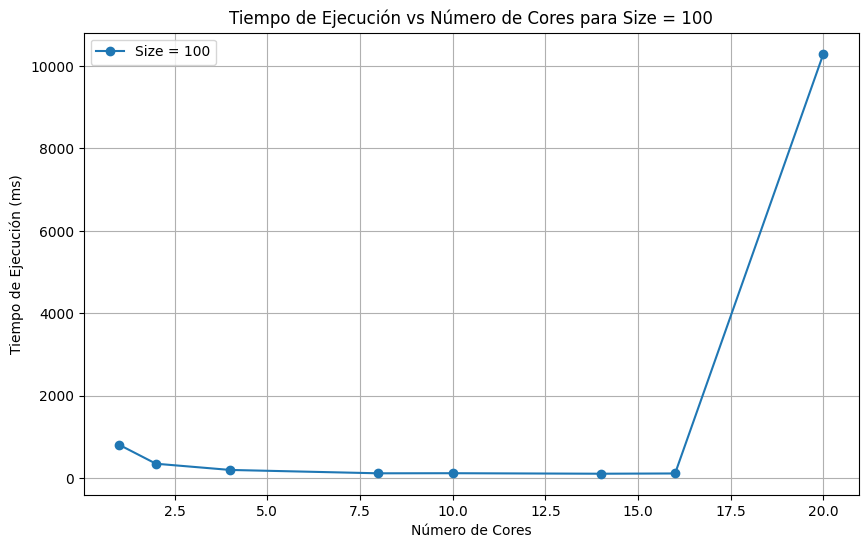

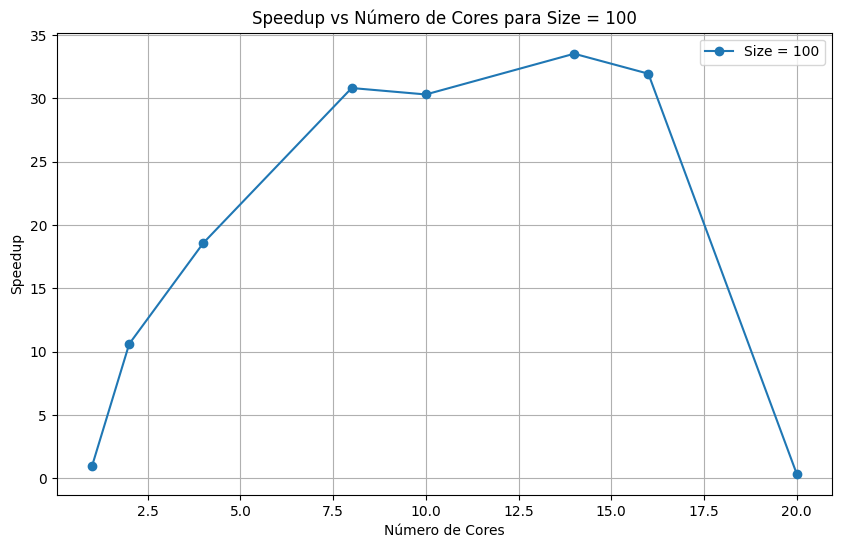

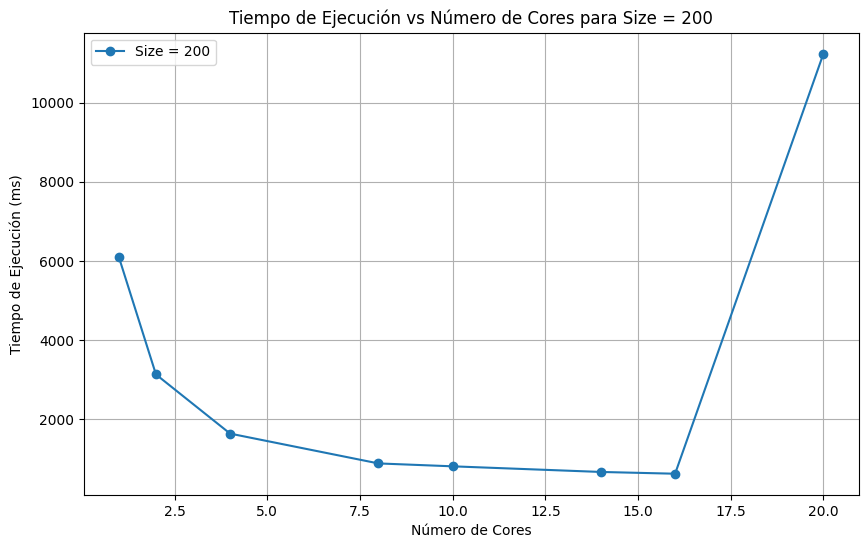

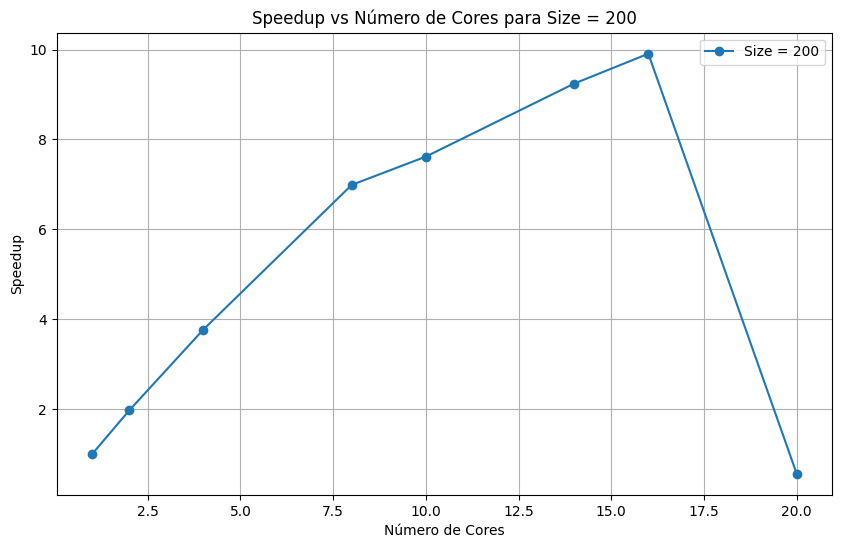

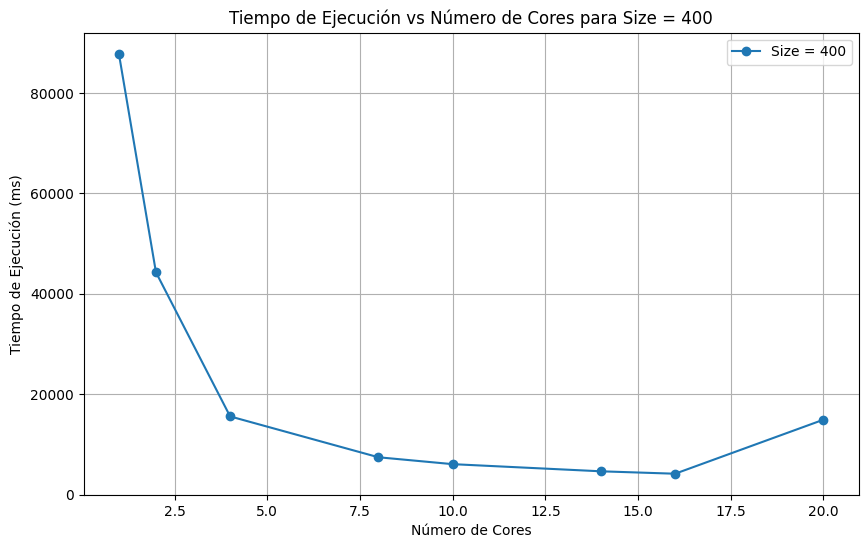

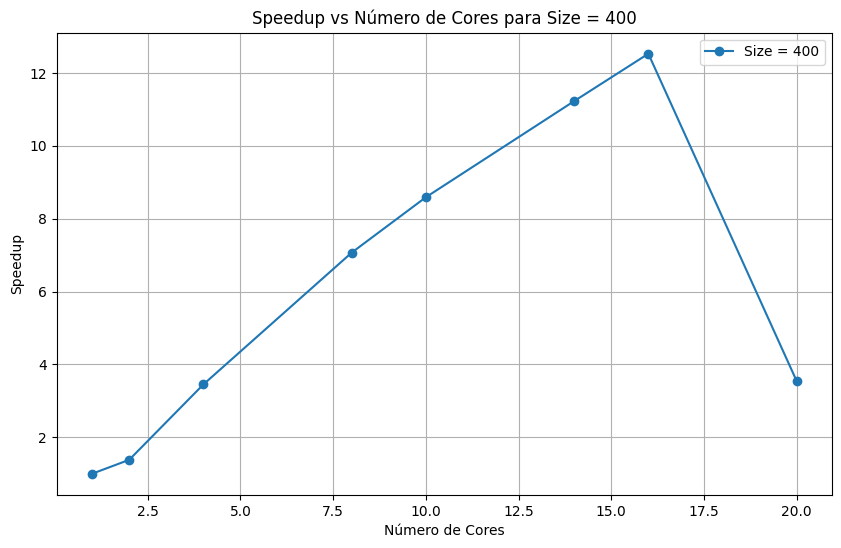

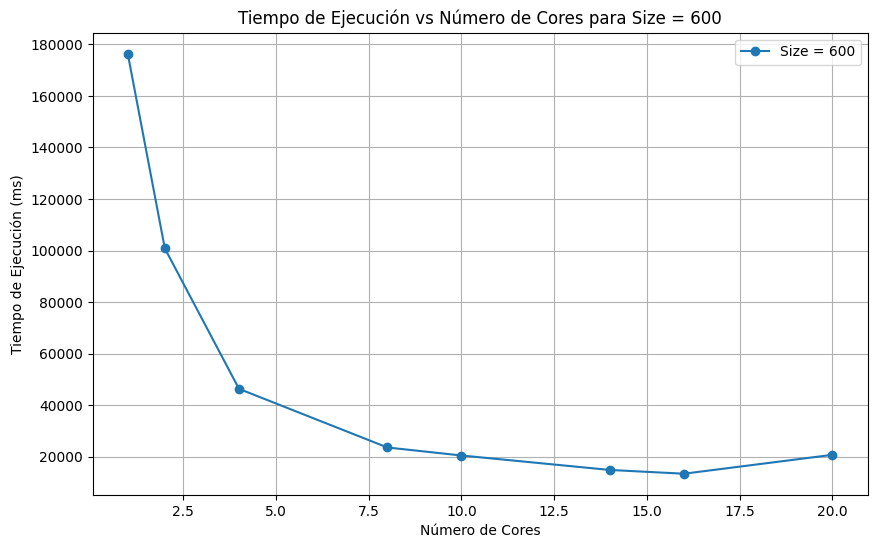

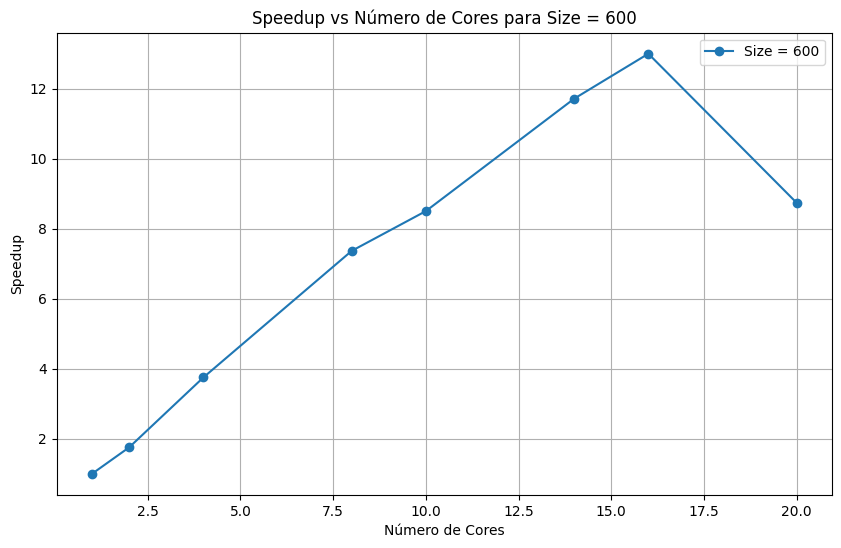

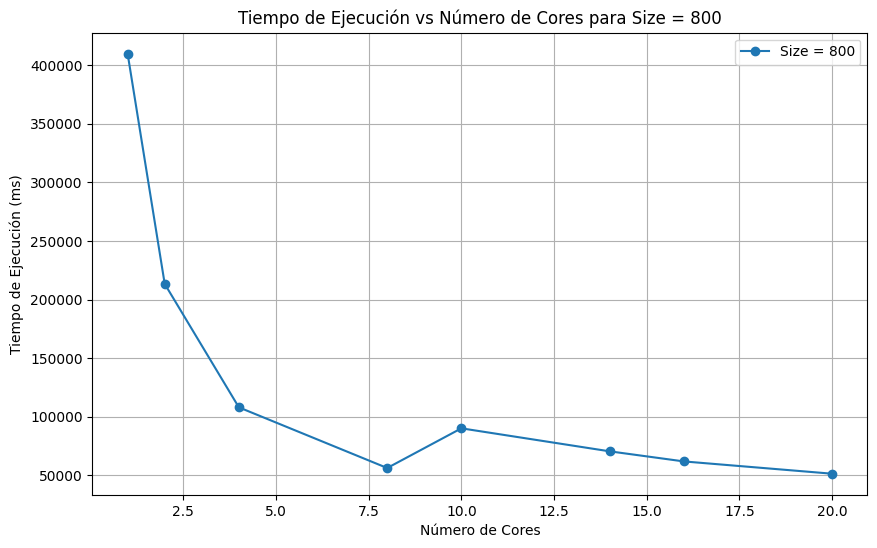

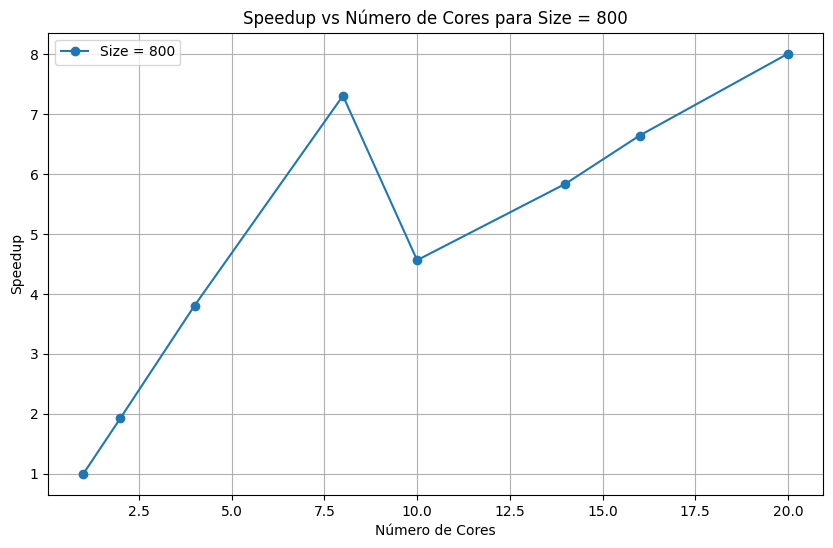

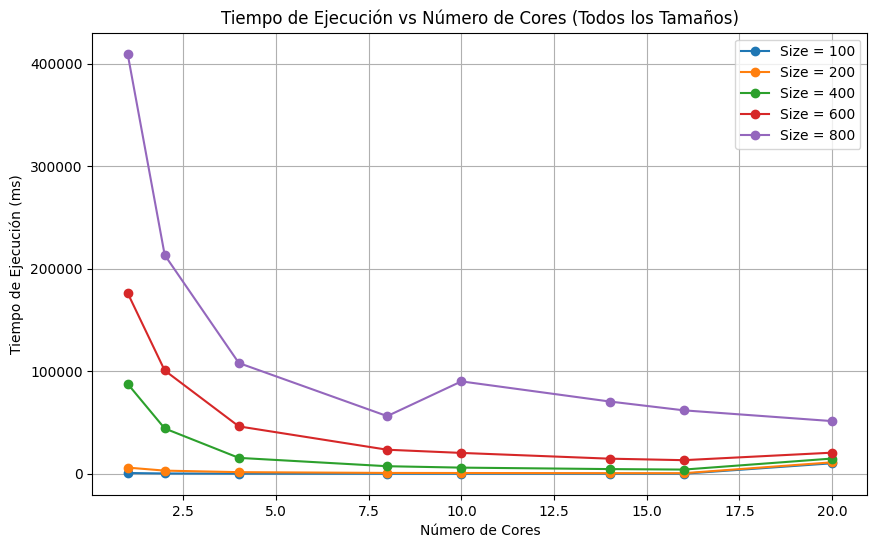

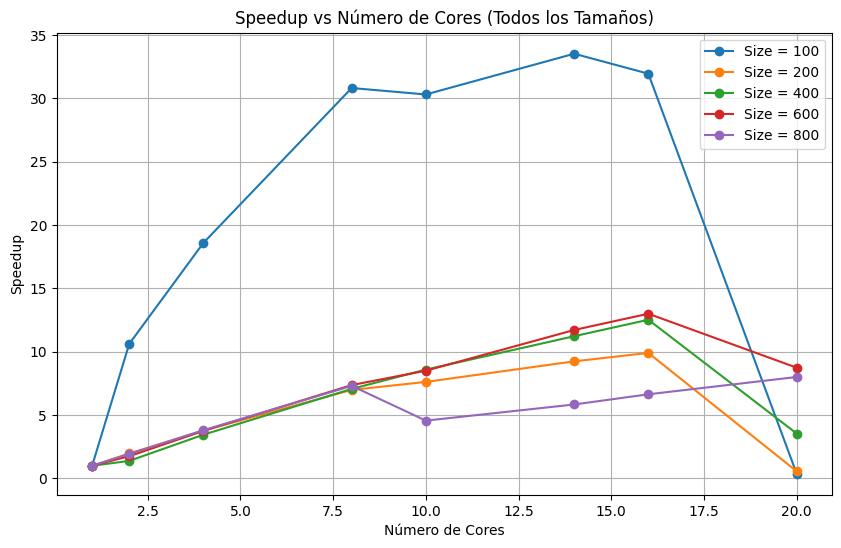

In [195]:
# Ejemplo de uso
graficar_rendimiento(df_complete)            # Se grafican las métricas

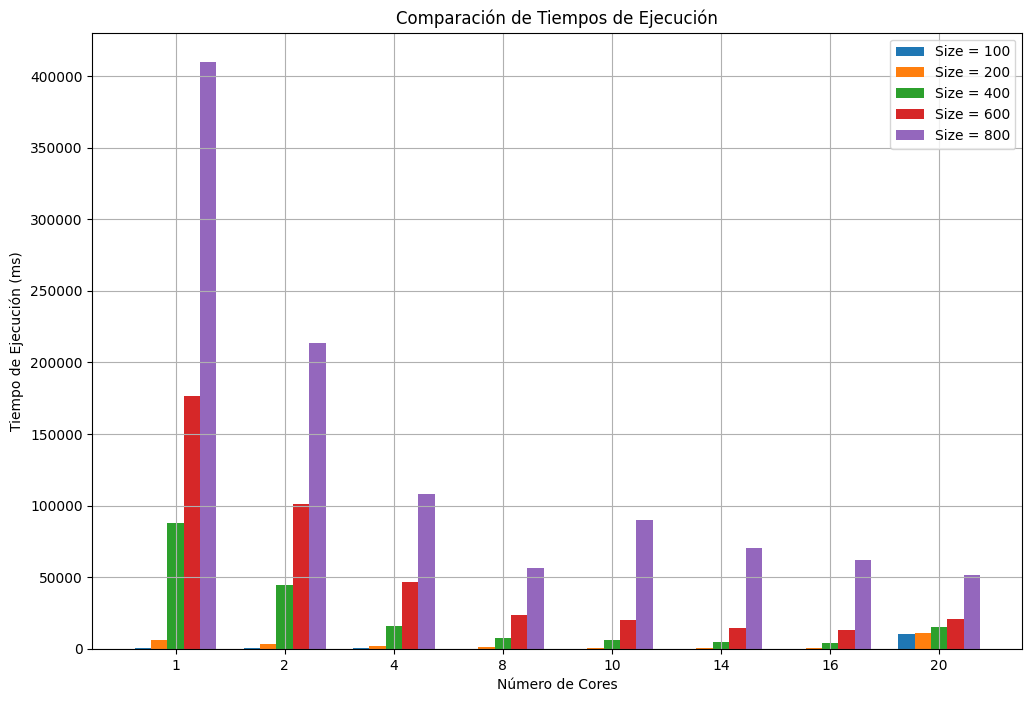

In [196]:
graficar_comparacion_tiempo(df_complete)            # Adicionalmente se adiciona la gráfica de la comparación de tiempos de ejecución para cada core

#### Encontrar el punto óptimo
Se determina el punto óptimo entre mejorar la métrica de rendimiento y adicionar más cores. Para este análisis, se escogió como punto óptimo aquel que muestra el menor incremento en beneficio o rendimiento con la adición de cores adicionales. Es decir, se identifica el número de cores en el que el aumento de rendimiento (ya sea en términos de Speedup o reducción en tiempo de ejecución) comienza a disminuir significativamente, indicando que agregar más cores más allá de este punto proporciona mejoras marginales. Este enfoque equilibra eficiencia y rendimiento, optimizando el uso de recursos computacionales sin incurrir en costos adicionales innecesarios o en rendimientos decrecientes.

In [197]:
df_optimo = encontrar_punto_optimo(df_complete)  # Se encuentra el punto óptimo

In [198]:
df_optimo                                        # Se visualizan los resultados

,Size,Core óptimo
0,100,8
1,200,16
2,400,16
3,600,16
4,800,8


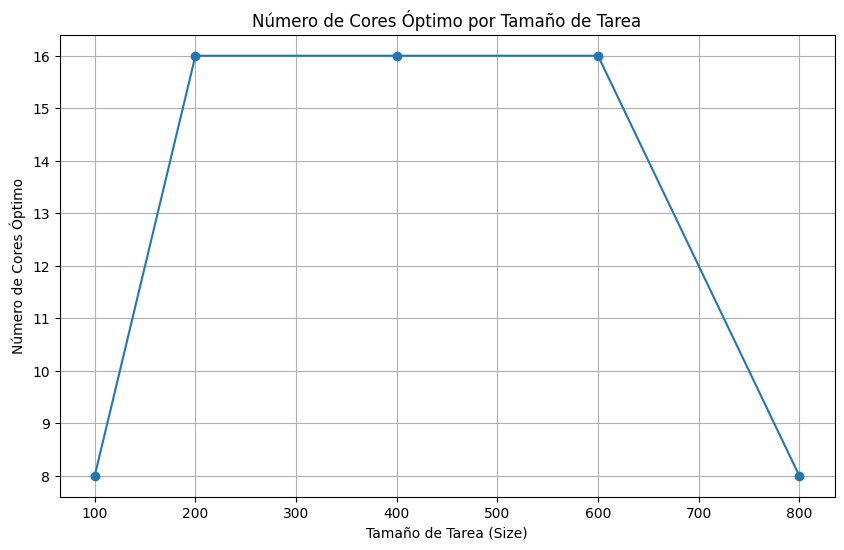

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(df_optimo['Size'], df_optimo['Core óptimo'], marker='o')
plt.title('Número de Cores Óptimo por Tamaño de Tarea')
plt.xlabel('Tamaño de Tarea (Size)')
plt.ylabel('Número de Cores Óptimo')
plt.grid(True)
plt.show()

### Segundo experimento
Se repiten los pasos para el segundo experimento, se ejecuta paso por paso de la misma manera. El segundo experimento consiste no en la ejecución de una matriz cuadrada sino de un fila que representa toda la matriz. 

       No. Core  valor             archivo  Size  Core
0             0   3942  MM1c-Size100-core1   100     1
1             0    652  MM1c-Size100-core1   100     1
2             0    721  MM1c-Size100-core1   100     1
3             0    651  MM1c-Size100-core1   100     1
4             0    693  MM1c-Size100-core1   100     1
...         ...    ...                 ...   ...   ...
11245         3  55776  MM1c-Size800-core8   800     8
11246         4  55776  MM1c-Size800-core8   800     8
11247         5  55776  MM1c-Size800-core8   800     8
11248         6  55776  MM1c-Size800-core8   800     8
11249         7  55776  MM1c-Size800-core8   800     8

[11250 rows x 5 columns]
                 archivo  Core  Iteración  Diferencia Tiempo
0     MM1c-Size100-core1     1          1                  0
1     MM1c-Size100-core1     1          2                  0
2     MM1c-Size100-core1     1          3                  0
3     MM1c-Size100-core1     1          4                  0
4     MM1

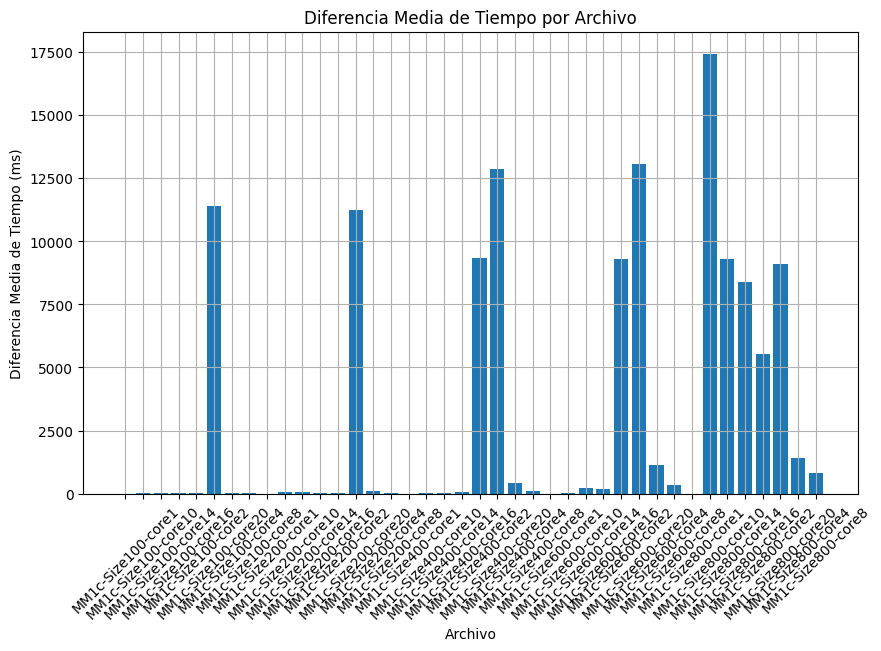

       No. Core  tiempo_ejecución             archivo  Size  Core  Iteración  \
0             0              3942  MM1c-Size100-core1   100     1          1   
1             0               652  MM1c-Size100-core1   100     1          2   
2             0               721  MM1c-Size100-core1   100     1          3   
3             0               651  MM1c-Size100-core1   100     1          4   
4             0               693  MM1c-Size100-core1   100     1          5   
...         ...               ...                 ...   ...   ...        ...   
11184         6             55899  MM1c-Size800-core8   800     8         26   
11049         7             58164  MM1c-Size800-core8   800     8         27   
11073         7             56017  MM1c-Size800-core8   800     8         28   
11185         7             55899  MM1c-Size800-core8   800     8         29   
11217         7             55788  MM1c-Size800-core8   800     8         30   

        Speedup  
0      1.000000  
1  

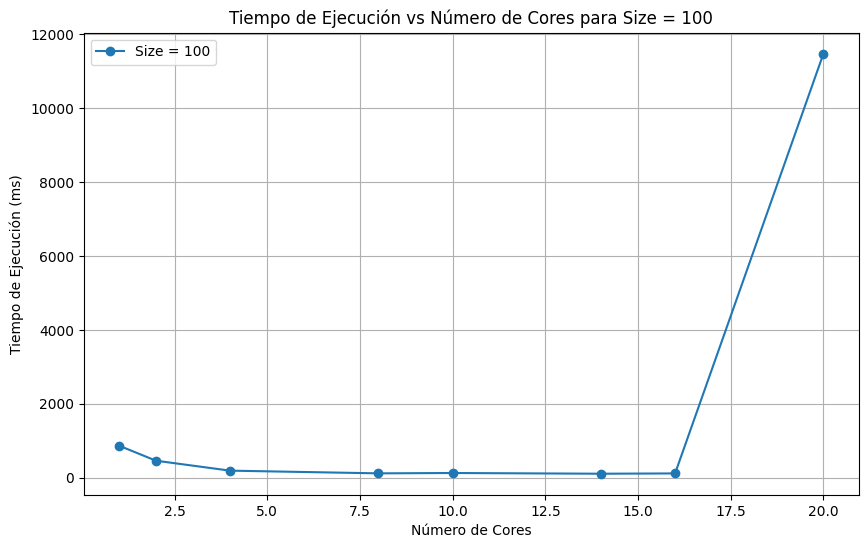

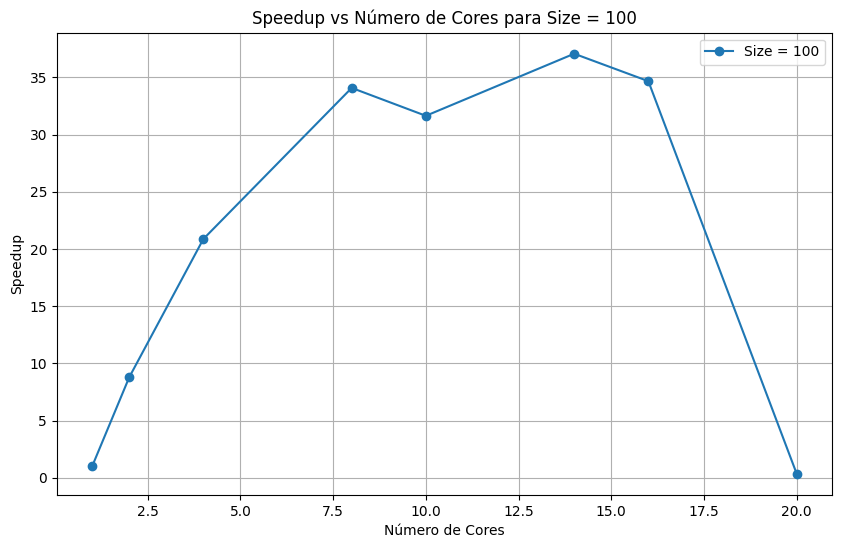

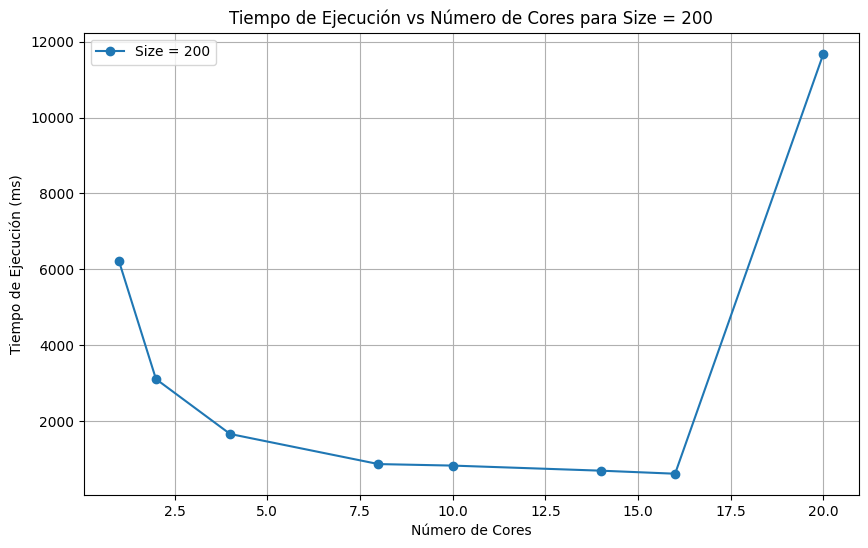

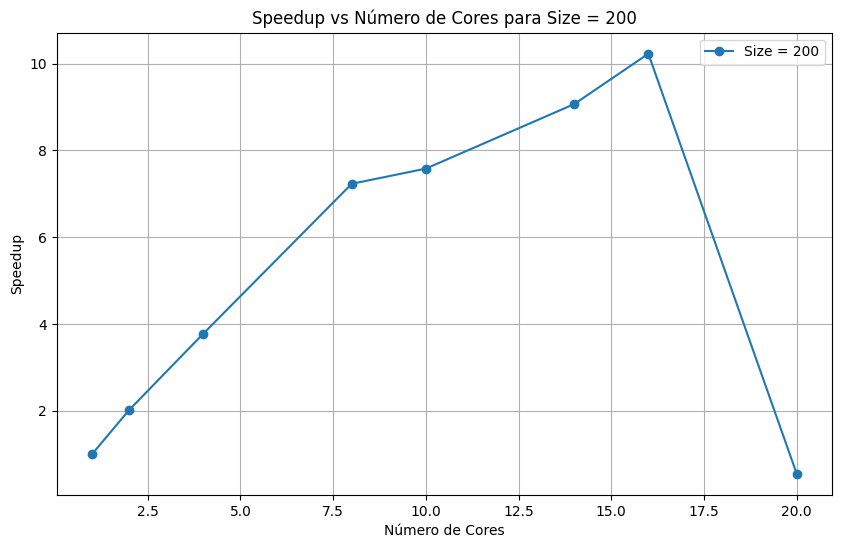

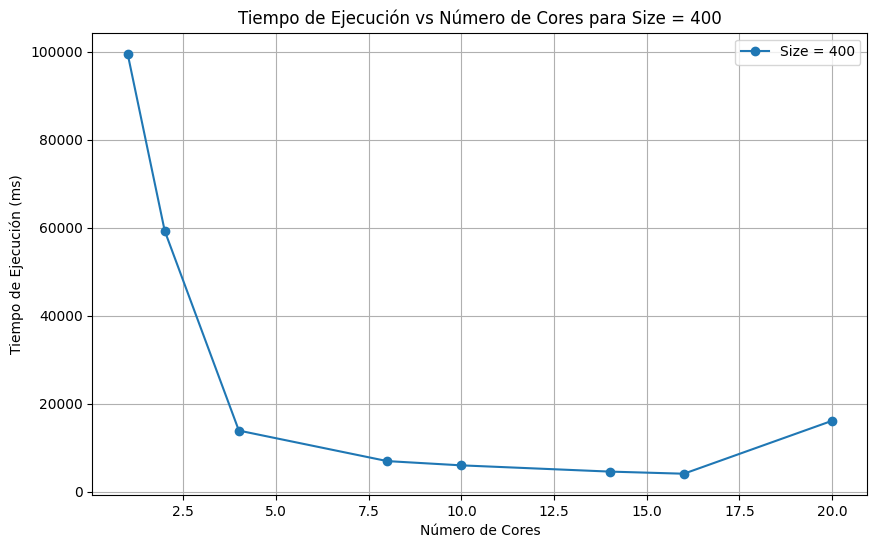

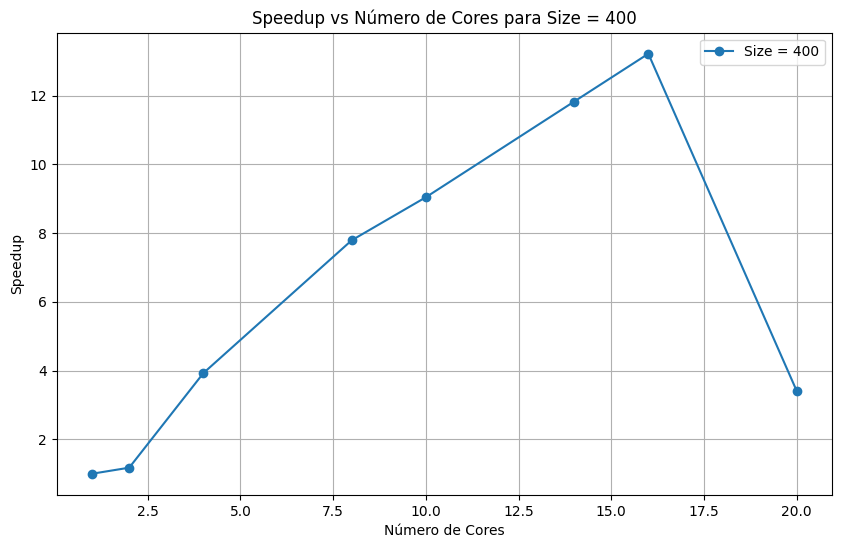

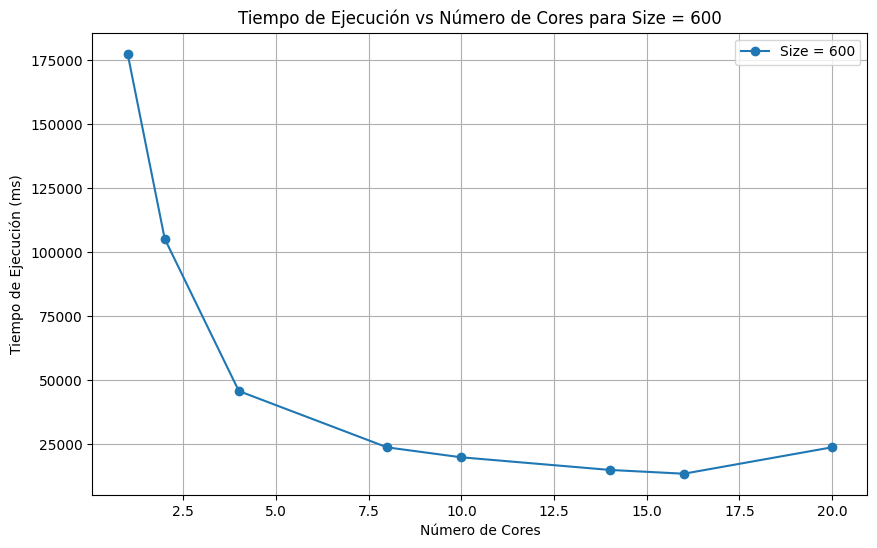

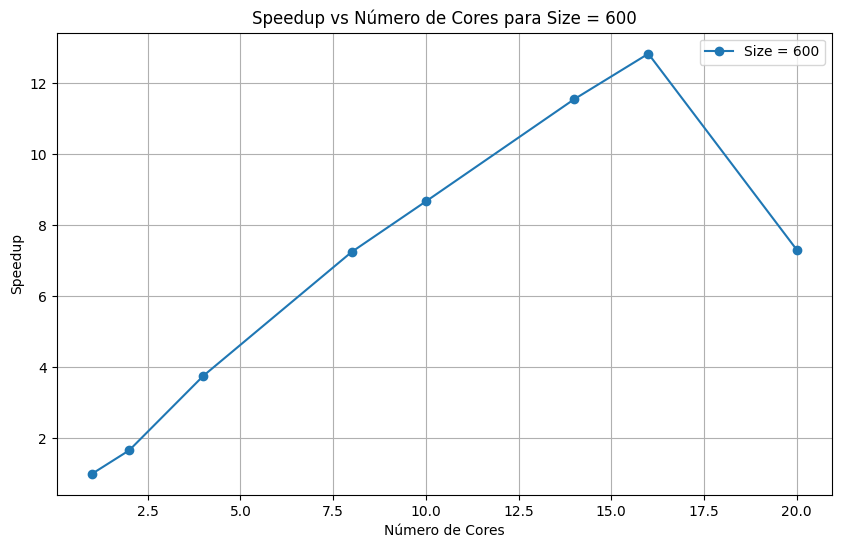

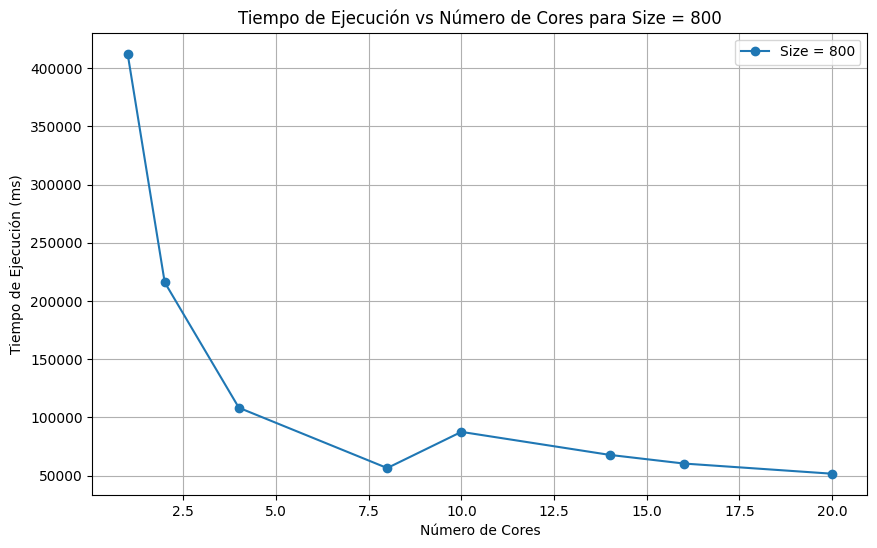

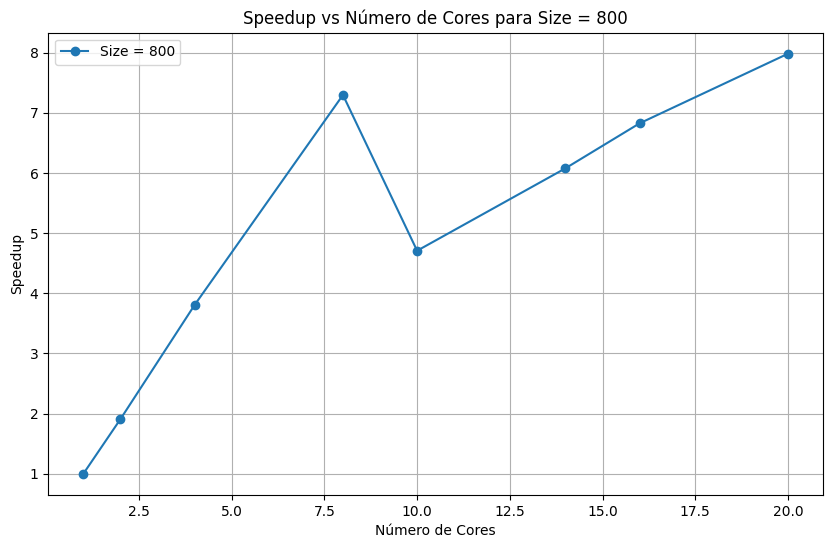

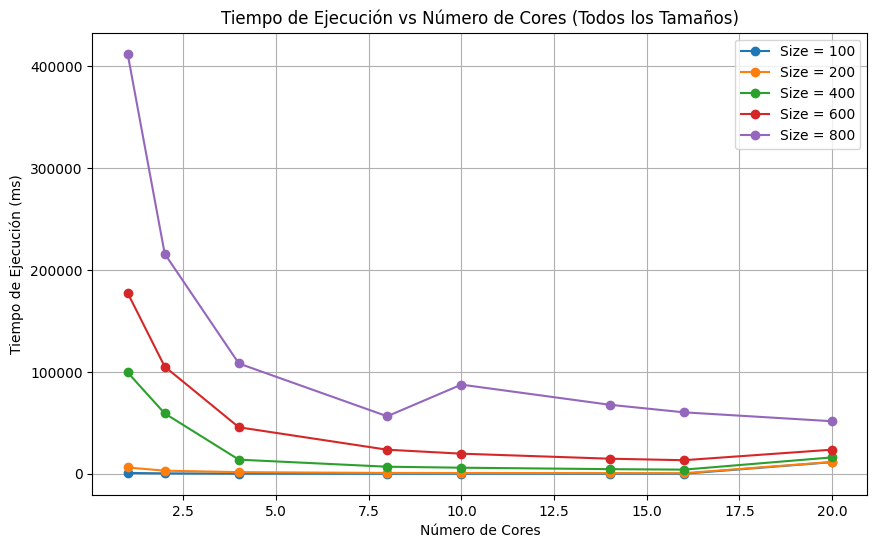

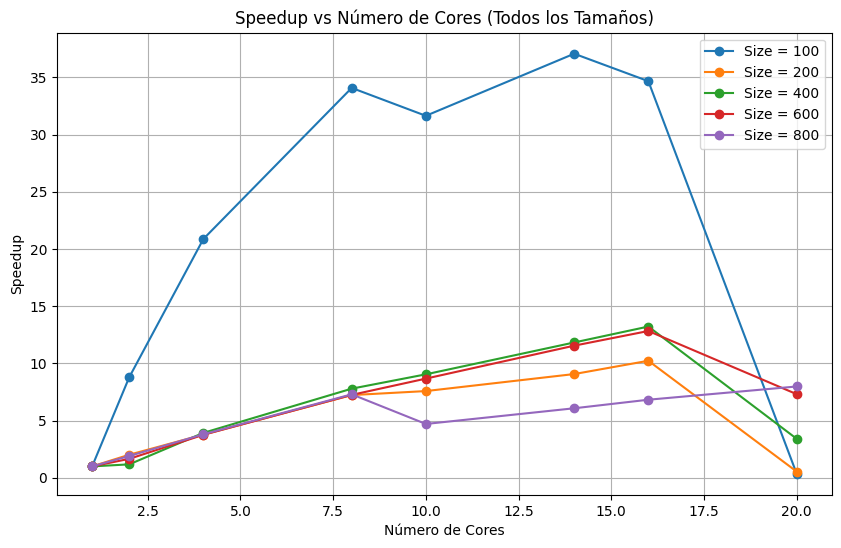

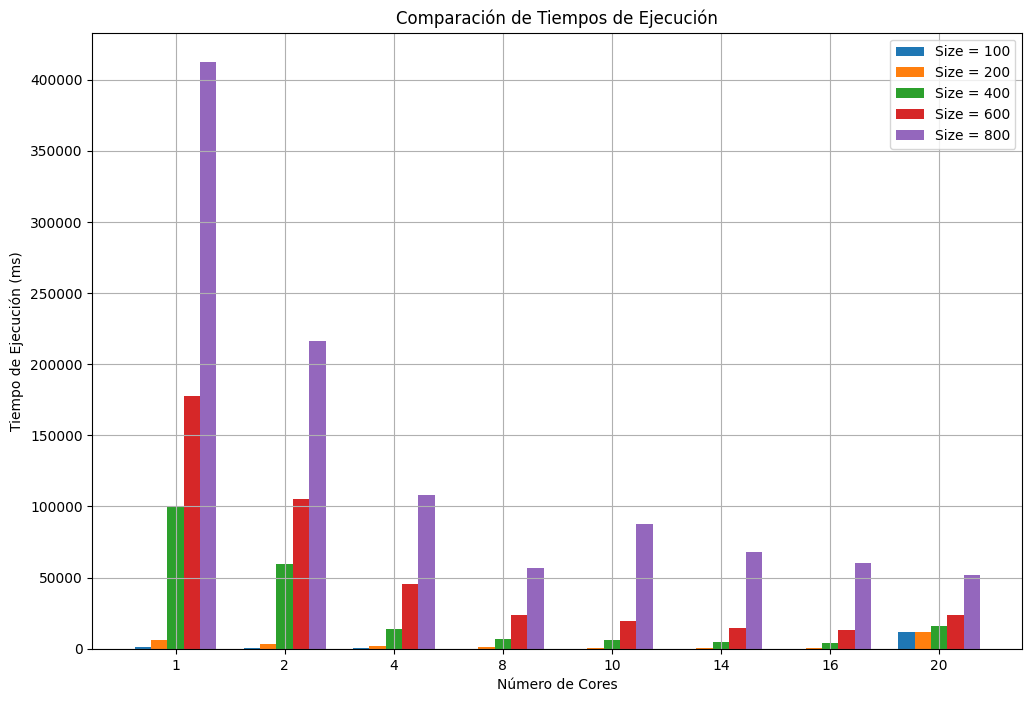

   Size  Core óptimo
0   100            8
1   200            8
2   400           16
3   600           16
4   800            8


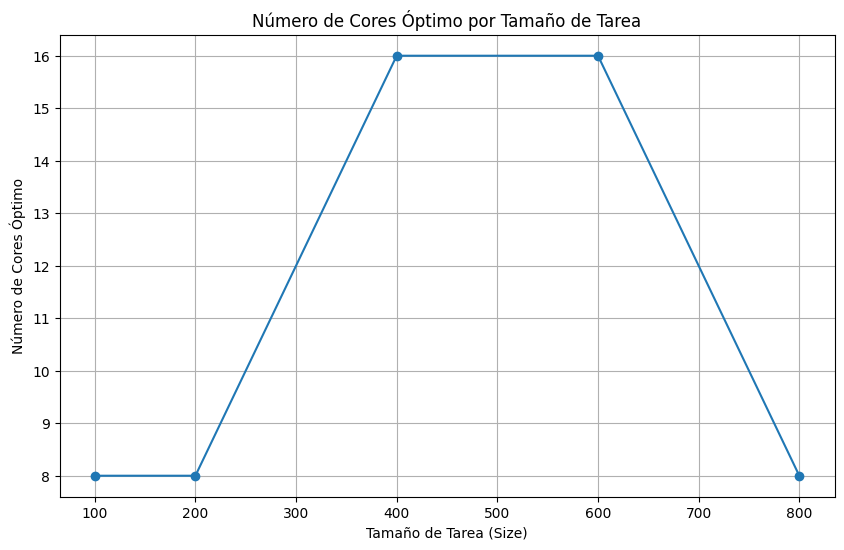

In [200]:
ruta = 'C:/Users/franc/Downloads/EXP-RendimientoMfilas/Soluciones'                                # Nueva ruta del experimento
datos = extraer_datos(ruta)                                                                       # Se extraen los datos y se guardan en el dataframe
df = ampliar_dataframe(datos)                                                                     # Se amplía la columna 'archivo' en 3 columnas MM, Size y Core
df = df.drop(columns=['MM'])                                                                      # Se elimina la columna MM que no aporta a nuestro análisis
print(df)                                                                                         # Se visualiza el dataframe 

df_iteraciones = agregar_numero_iteracion(df)                                                     # Se añade la columna de número de iteraciones
df_iteraciones.to_csv('C:/Users/franc/Downloads/EXP-RendimientoMfilas/resultados.csv')            # Si se desea se puede utilizar este método de pandas para poder exportar en cualquier momento el dataframe a un csv y poderlo abrir desde una hoja de cálculo  para el fácil análisis.

df_max = filtrar_maximos_por_iteracion(df_iteraciones)                                            # Se calcula el máximo tiempo que le toma a un proceso completarse a partir de encontrar el máximo tiempo en cada uno de los cores. Se conserva únicamente dicho registro. 

df_dt = calcular_diferencia_tiempo_por_iteracion(df_iteraciones)                                  # Se calculan los deltas de tiempo entre ejecuciones 
print(df_dt)                                                                                      # Se visualiza el resultado
# Agrupar por archivo y calcular la media de la diferencia de tiempo
df_dt_grouped = df_dt.groupby('archivo')['Diferencia Tiempo'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_dt_grouped['archivo'], df_dt_grouped['Diferencia Tiempo'])
plt.title('Diferencia Media de Tiempo por Archivo')
plt.xlabel('Archivo')
plt.ylabel('Diferencia Media de Tiempo (ms)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df_complete = calcular_speedup(df_max)                                                            # Se añade la columna Speedup

print(df_complete)                                                                                # Se visualiza el dataframe completo

graficar_rendimiento(df_complete)                                                                 # Se grafican las métricas

graficar_comparacion_tiempo(df_complete)                                                          # Adicionalmente se adiciona la gráfica de la comparación de tiempos de ejecución para cada core

df_optimo = encontrar_punto_optimo(df_complete)                                                   # Se encuentra el punto óptimo

print(df_optimo)                                                                                  # Se visualizan los resultados
plt.figure(figsize=(10, 6))
plt.plot(df_optimo['Size'], df_optimo['Core óptimo'], marker='o')
plt.title('Número de Cores Óptimo por Tamaño de Tarea')
plt.xlabel('Tamaño de Tarea (Size)')
plt.ylabel('Número de Cores Óptimo')
plt.grid(True)
plt.show()

### Comparación de ambos experimentos
A continuación se compararán los resultados de ambos experimentos, el de la matriz cuadrada que se encuentra en df_complete_c y el de la matriz convertida en vector, que se encuentra en df_complete

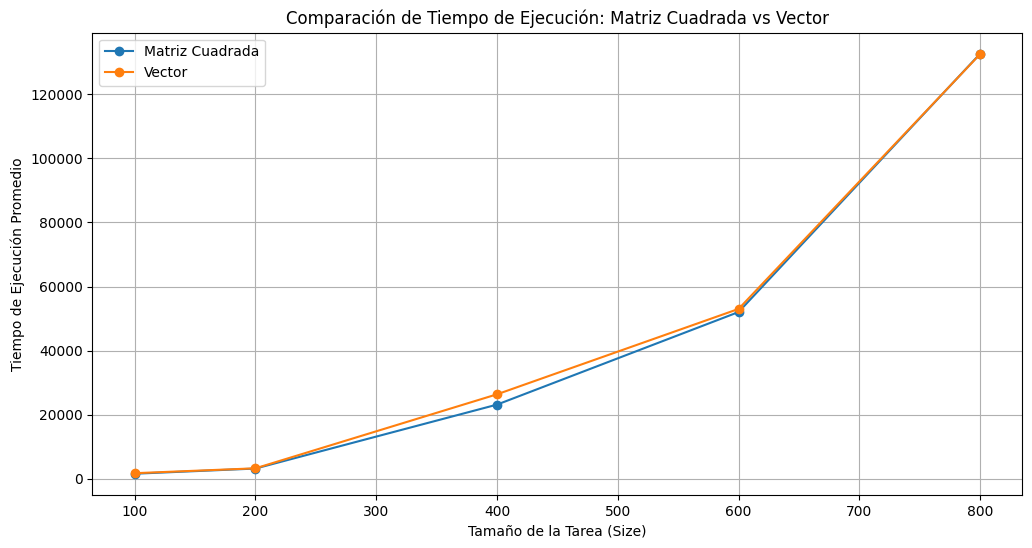

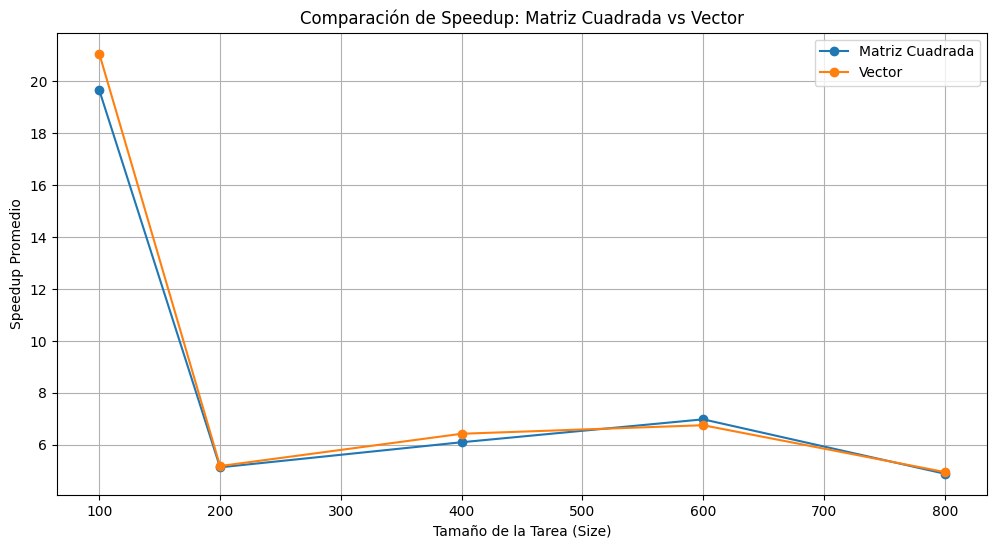

In [203]:
# Ejemplo de cómo podrían lucir tus DataFrames
df_matriz_cuadrada = df_complete_c
df_vector = df_complete

# Selecciona solo las columnas numéricas para el cálculo de la media
cols_numericas = ['tiempo_ejecución', 'Speedup']

# Calcula los promedios de tiempo de ejecución y Speedup por tamaño de tarea
promedios_matriz_cuadrada = df_matriz_cuadrada.groupby('Size')[cols_numericas].mean().reset_index()
promedios_vector = df_vector.groupby('Size')[cols_numericas].mean().reset_index()

# Gráfico de comparación de tiempo de ejecución
plt.figure(figsize=(12, 6))
plt.plot(promedios_matriz_cuadrada['Size'], promedios_matriz_cuadrada['tiempo_ejecución'], marker='o', label='Matriz Cuadrada')
plt.plot(promedios_vector['Size'], promedios_vector['tiempo_ejecución'], marker='o', label='Vector')
plt.title('Comparación de Tiempo de Ejecución: Matriz Cuadrada vs Vector')
plt.xlabel('Tamaño de la Tarea (Size)')
plt.ylabel('Tiempo de Ejecución Promedio')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de comparación de Speedup
plt.figure(figsize=(12, 6))
plt.plot(promedios_matriz_cuadrada['Size'], promedios_matriz_cuadrada['Speedup'], marker='o', label='Matriz Cuadrada')
plt.plot(promedios_vector['Size'], promedios_vector['Speedup'], marker='o', label='Vector')
plt.title('Comparación de Speedup: Matriz Cuadrada vs Vector')
plt.xlabel('Tamaño de la Tarea (Size)')
plt.ylabel('Speedup Promedio')
plt.legend()
plt.grid(True)
plt.show()